In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit,transpile
import qiskit_ibm_runtime.fake_provider as fk

from qiskit.transpiler import generate_preset_pass_manager
from qiskit.circuit.library import RealAmplitudes

/var/folders/_9/dhlh8y415jx54r4xwjd06yp40000gq/T/ipykernel_12481/2059188649.py:3: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  qc = RealAmplitudes(num_qubits=12,reps=1,entanglement='circular'\


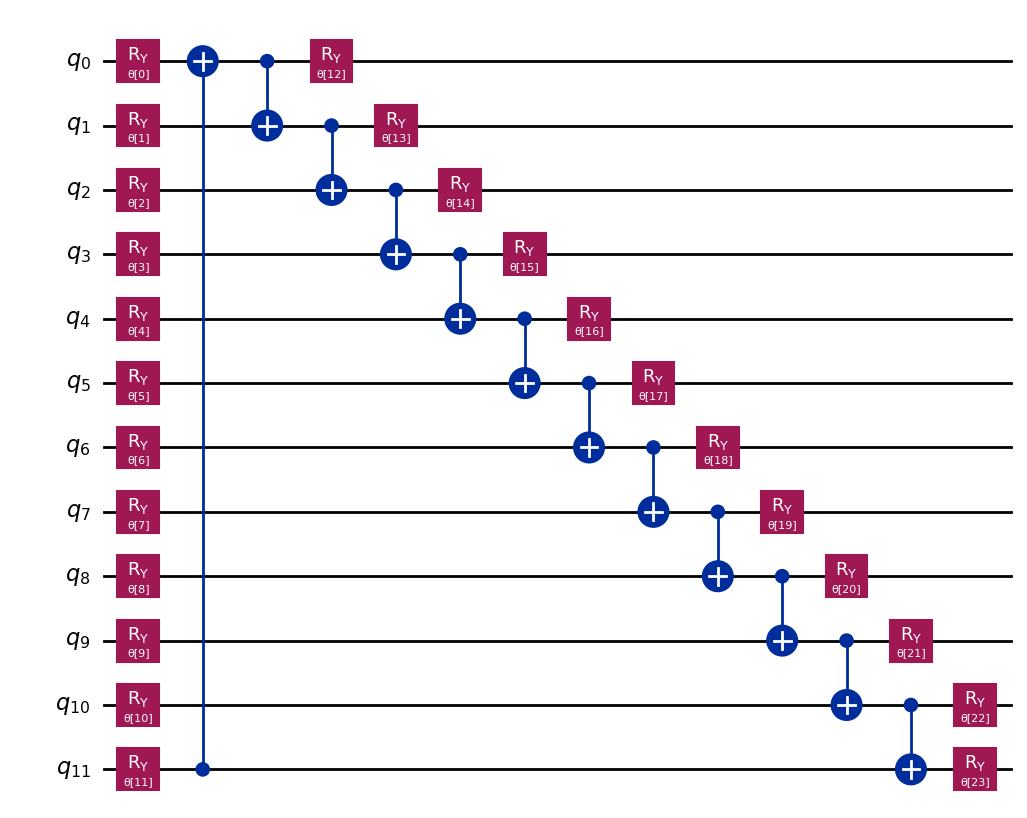

In [2]:
 
backend =  fk.FakeAuckland()
 
qc = RealAmplitudes(num_qubits=12,reps=1,entanglement='circular'\
                    ,flatten=True)
qc.draw('mpl')
#print(qc.)


In [3]:
pass_manager = generate_preset_pass_manager(
        optimization_level=2,
        backend=backend,
        layout_method='sabre',  # Fixed layout mapped in circuit order
        seed_transpiler=23,  # For reproducible results
    )

depth 37


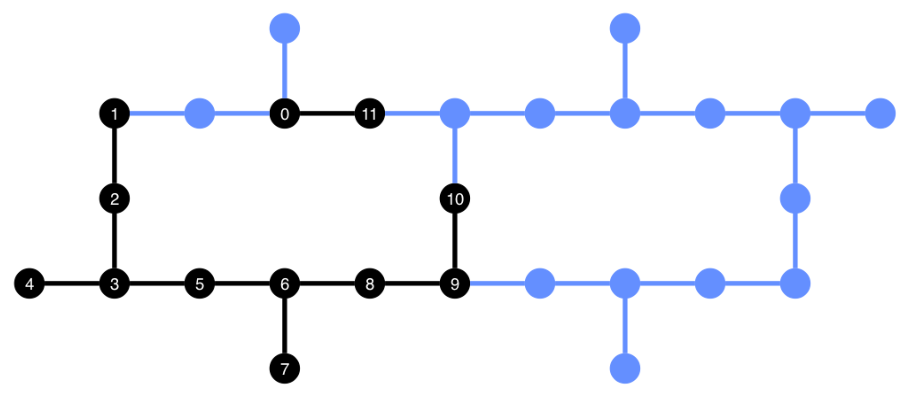

In [4]:
from qiskit.visualization import plot_circuit_layout, plot_coupling_map
 
# Plot the hardware graph and indicate which hardware qubits were chosen to run the circuit
transpiled_circ = pass_manager.run(qc)
print("depth",transpiled_circ.depth())
plot_circuit_layout(transpiled_circ, backend)



depth 14


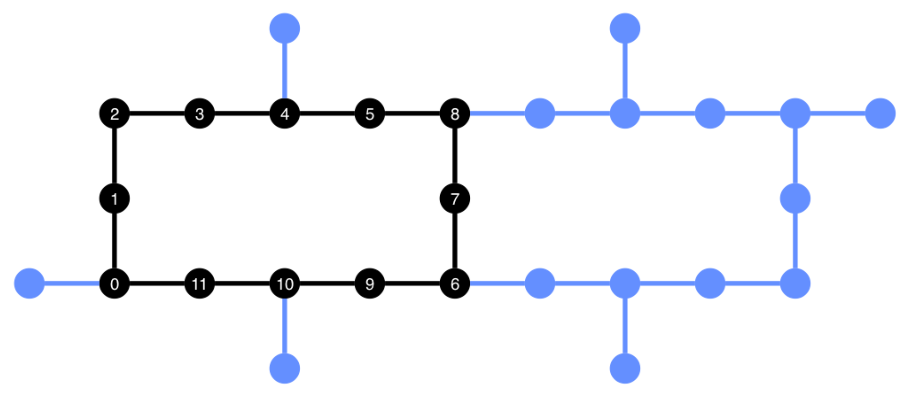

In [5]:

# Manual layout mapping
from qiskit.transpiler import Layout, PassManager,CouplingMap
from qiskit.transpiler.passes import SetLayout

map= [1, 2, 3, 5, 8, 11,12,13,14,10,7,4]

# Define the mapping: Logical qubits to physical qubits
manual_layout = Layout({qc.qubits[i]: map[i] for i in range(12)})


# Create PassManager and add SetLayout pass
#pm = generate_preset_pass_manager(optimization_level=2, backend=backend)

pm =PassManager()
pm.append(SetLayout(manual_layout))
#pm[0]=pm1


# Transpile with PassManager
manual_circuit = pm.run(qc)

#manual_circuit.draw('mpl')
print("depth",manual_circuit.depth())
plot_circuit_layout(manual_circuit, backend)
